In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 数据导入

In [2]:
w = pd.read_csv('../data/bike_od.csv')
print(w.shape) # 查看数据大小
w.head()

(99999, 9)


,user,platform,start_time,start_lon,start_lat,end_time,end_lon,end_lat,dis
0,7f508e26ae95478ac8b7cda2d88b4424,f52411b549236c64cbfad398527b06f0,2017-10-01 07:53:37,104.039897,30.525454,2017-10-01 07:56:25,104.042991,30.525805,299.481524
1,48bdf631eae97a0b7e6dddb9bd672491,f52411b549236c64cbfad398527b06f0,2017-10-01 17:54:15,103.877410,30.560417,2017-10-01 17:57:43,103.877011,30.560110,51.222150
2,56f6e3d6c92224aa58f5fb82a33d2ac5,f52411b549236c64cbfad398527b06f0,2017-10-01 08:31:24,104.073352,30.667557,2017-10-01 08:31:32,104.073372,30.667488,7.886066
3,b1398642247778f83470f09e923163f3,f52411b549236c64cbfad398527b06f0,2017-10-01 16:21:33,104.105804,30.680654,2017-10-01 16:27:42,104.100628,30.681912,515.202671
4,2fd5d6e292aad0c661c9e6480d4b9edc,f52411b549236c64cbfad398527b06f0,2017-10-01 22:36:45,104.064834,30.688940,2017-10-01 22:45:41,104.064870,30.689018,9.309940


### 问题1：查看用户87347011edded1387ca0cef5a7bdea28的骑行大于20m的数据数据

In [3]:
user1 = '87347011edded1387ca0cef5a7bdea28'
user1_data = w[w['user']==user1]

In [4]:
user1_data

,user,platform,start_time,start_lon,start_lat,end_time,end_lon,end_lat,dis
4057,87347011edded1387ca0cef5a7bdea28,f52411b549236c64cbfad398527b06f0,2017-10-01 10:41:11,103.958588,30.688974,2017-10-01 10:42:55,103.958632,30.688974,4.215764
24257,87347011edded1387ca0cef5a7bdea28,f52411b549236c64cbfad398527b06f0,2017-10-01 11:52:19,103.958563,30.688981,2017-10-01 12:02:15,103.958708,30.688565,48.166572
61397,87347011edded1387ca0cef5a7bdea28,f52411b549236c64cbfad398527b06f0,2017-10-01 17:07:51,103.958046,30.689294,2017-10-01 17:08:04,103.958251,30.689333,20.111820
78890,87347011edded1387ca0cef5a7bdea28,f52411b549236c64cbfad398527b06f0,2017-10-01 12:54:14,103.958640,30.688963,2017-10-01 12:54:34,103.958702,30.688961,5.944533
93001,87347011edded1387ca0cef5a7bdea28,f52411b549236c64cbfad398527b06f0,2017-10-01 09:02:01,103.958600,30.688988,2017-10-01 09:02:10,103.958639,30.688960,4.857876


In [5]:
user1_data[user1_data['dis']>20]

,user,platform,start_time,start_lon,start_lat,end_time,end_lon,end_lat,dis
24257,87347011edded1387ca0cef5a7bdea28,f52411b549236c64cbfad398527b06f0,2017-10-01 11:52:19,103.958563,30.688981,2017-10-01 12:02:15,103.958708,30.688565,48.166572
61397,87347011edded1387ca0cef5a7bdea28,f52411b549236c64cbfad398527b06f0,2017-10-01 17:07:51,103.958046,30.689294,2017-10-01 17:08:04,103.958251,30.689333,20.111820


### 问题2. 用户总量是多少？最大骑行次数？最小骑行次数？用`df['A'].value_counts()`函数完成

In [6]:
user_count = w['user'].value_counts()
user_count

e10be3d518b3d2dfaf04462847cbd16c    90
1dfc752e7b8392c81d54ecb88312e80e    72
6381f2120d1fa9811a4473c78f9fdf55    67
7263e7ec310edfb06f2bd83ad3f9ff4e    62
8e3dbab5841a7d449bfb8f8c2bf078f1    60
                                    ..
67358df39a1a1e808116500c403dacf2     1
bc47148ef502712df33e8ebbb0a7a089     1
6abe7e5bb879857d3c1db646408a472a     1
4c63719b9b56b2c89fd35e98bf994e6f     1
adc1028238b0982c035768eefdc6e4c5     1
Name: user, Length: 25779, dtype: int64

In [7]:
user_num = len(user_count.values)
max_times = max(user_count.values)
min_times = min(user_count.values)


In [8]:
print(user_num)
print(max_times)
print(min_times)

25779
90
1


### 问题3：用户的平均骑行次数？

In [9]:
avg_times = sum(user_count.values)/user_num
print(avg_times)

3.8790876294658445


### 问题4：用户的平均骑行距离？

In [10]:
avg_len = sum(w['dis'])/len(w)

In [11]:
print(avg_len)

285.00888228855973


### 问题5：有多少平台，每个平台的骑行数量分布？ 百分数占比？

In [12]:
platform_num = w['platform'].value_counts()
print(platform_num)

f52411b549236c64cbfad398527b06f0    88780
24128e85e41d2d37218f2a01b6817a81    10012
84a42f2803c8de332042416550990d36      531
437a670396979416774414d239726485      260
230cb4fc9919b9989dd4b45823efa609      214
6ee5fe228323d6508c8d42abf043071f      111
343f5a26aff53f87682ac055fc062833       51
a1610f8f823abae6056b26ae35703e42       29
6dfe349b21ab8c07e80489685603a941        6
616fcdf309684c2b2ed0f5174a6ccdb8        2
8149f20db762c2d0194b8f58ae9309f4        2
218eadaf5f19a61939805f60ebfefac1        1
Name: platform, dtype: int64


In [13]:
print(len(platform_num))

12


In [14]:
platform_num.describe()

count       12.000000
mean      8333.250000
std      25493.712313
min          1.000000
25%          5.000000
50%         81.000000
75%        327.750000
max      88780.000000
Name: platform, dtype: float64

### 问题6：增加一列，名称为hour(以开始时间为准)，表示小时，统计每小时的骑行用户数量，统计每小时的骑行总量，并可视化
提示：
* 思路1：数据导入时，数据列为字符串，可以根据小时在字符串的位置提取小时特征
* 思路2：用pd.to_datetime(df.A)，将A列转化为时间格式，之后针对每个单元数据i,可以使用i.hour提取小时特征

```
w['start_time'] = pd.to_datetime(w['start_time'])
w.start_time[0].hour
```

In [3]:
w['start_time'] = pd.to_datetime(w['start_time'])


In [4]:
w.start_time[1].hour

17

In [14]:
w['hour'] = w.start_time

In [15]:
j = 0
for i in w['hour']:
    w.loc[j,'hour'] = i.hour
    j+=1

In [17]:
b = w['hour'].value_counts()

In [21]:
b = b.sort_index()

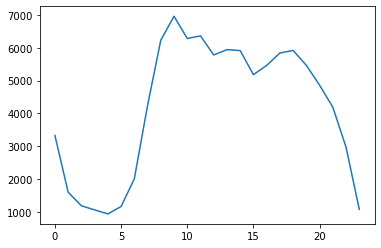

In [30]:
plt.plot(b.index,b.values)

### 问题7：统计每个平台每小时的出行量，并进行可视化（折线图）
提示，用下面的代码画多条折线图：
```
platforms = df.platform.unique()
for p in platforms:
    data = df[df.platform==p]
    plt.plot(data.hour, data.n)  # 循环，每次画一个平台的折线图
plt.show()
```

In [24]:
platforms = w.platform.unique()

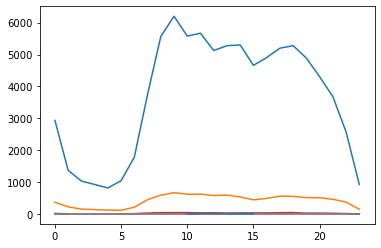

In [25]:

for p in platforms:
    data = w[w.platform==p]
    data = data['hour'].value_counts()
    data = data.sort_index()

    plt.plot(data.index, data.values)  # 循环，每次画一个平台的折线图
plt.show()


### 问题8：用户的平均骑行时间？
提示：将start_time和end_time列转为时间格式，之后求时间差值

```
w['start_time'] = pd.to_datetime(w['start_time'])
w['end_time'] = pd.to_datetime(w['end_time'])
delta = w.end_time[0] - w.start_time[0]
delta.seconds  # 返回间隔的秒数
```

In [26]:
w['start_time'] = pd.to_datetime(w['start_time'])
w['end_time'] = pd.to_datetime(w['end_time'])

w['seconds']=0
for i in range(0,len(w)):
    delta = w.end_time[i] - w.start_time[i]
    w.loc[i,'seconds'] = delta.seconds
    


In [48]:
avg_biketime = sum(w['seconds'])/len(w)
avg_biketime

715.9637596375964

### 问题9：导出骑行距离大于1km，或骑行时间大于2分钟的所有记录到../data/out.xlsx文件

In [54]:
output = w[(w['dis']>1000)&(w['seconds']>120)]

In [67]:
path = '../data/out.xlsx'

In [68]:
output.to_excel(path)